## Exploring the Dataset Files

In [0]:
import json

In [ ]:
# this code block allows you to inspect 2 tweets and 2 retweets in the dataset
# it also saves all the unique tweets/retweets in the dictionary tweets
# this code will help you to understand the data
# feel free to print out more fields

lines=0
num_tweets=0
num_retweets=0
print_tweet = 0
print_retweet = 0
tweets = {}

#insert path and replace name of the file below as needed
with open("/Users/sasankchindirala/PycharmProjects/dbms-project/dbms-stat694-sp2024-team31/data/corona-out-2", "r") as f1:
    for line in f1:
        try:
            data = json.loads(line)
            lines = lines + 1
            if ( data['text'].startswith('RT') ):
                num_retweets += 1
                #print out some fields of one retweet 
                #note that you should look at other fields too
                if (print_retweet < 2):
                    print_retweet += 1
                    print('RETWEET\n','id--',data['id'],'text--',data['text'],'\n')
                    
                    print('User-- ',data['user'],'\n')
                  
                    print('retweetstatus--',data['retweeted_status'],'\n')
                  

            else:
                num_tweets += 1
                #print out some fields of one tweet 
                #note that you should look at other fields too
                if (print_tweet < 2):
                    print_tweet += 1
                    print('TWEET\n','id--',data['id'],'text--',data['text'],'\n')
                    print('User-- ',data['user'],'\n')
                    


            if (data['id_str'] not in tweets):
                tweets[data['id_str']] = data
            
        except:
            # if there is an error loading the json of the tweet, skip
            continue
            
print('num of lines=',lines, 'num of tweets=',num_tweets, 'num of retweets=',num_retweets)
print('num of unique tweets/retweets=',len(tweets.keys()))

In [ ]:
# print the last data item
data

In [ ]:
data['user']

In [ ]:
# this is a partial template for processing the dataset to store into the datastores.
# you will need to write functions for the psuedocode sections and invoke them here

#insert path and replace name of the file below as needed
with open("/Users/sasankchindirala/PycharmProjects/dbms-project/dbms-stat694-sp2024-team31/data/corona-out-2", "r") as f1:
    for line in f1:
        try:
            data = json.loads(line)
            # pseudocode: 
            # if tweet has been seen before, 
            #         continue (ignore this tweet, go to next iteration of loop)
            
            user = data['user']
            # psuedocode: 
            # if user has not been seen before
            #            add to user table 
            # update datastores with any metrics that you are tracking 
            
            if ( data['text'].startswith('RT') ):
                # psuedocode:
                # update retweet information
                # note that you may not have an entry for the original tweet 
                # if that is not in the dataset
                pass  # does nothing right now
                
            else:
                # psuedocode:
                # add the new tweet to datastore
                pass # does nothing right now
        except:
            continue

## Performing some Exploratory Data Analysis 

In [9]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
cor_2_df = pd.read_json("corona-out-2", lines=True)
cor_3_df = pd.read_json("corona-out-3", lines=True)

In [3]:
df = pd.concat([cor_2_df, cor_3_df])

In [5]:
print(df.shape)

(120434, 37)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120434 entries, 0 to 101915
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype              
---  ------                     --------------   -----              
 0   created_at                 120434 non-null  datetime64[ns, UTC]
 1   id                         120434 non-null  int64              
 2   id_str                     120434 non-null  int64              
 3   text                       120434 non-null  object             
 4   source                     120434 non-null  object             
 5   truncated                  120434 non-null  bool               
 6   in_reply_to_status_id      16138 non-null   float64            
 7   in_reply_to_status_id_str  16138 non-null   float64            
 8   in_reply_to_user_id        17589 non-null   float64            
 9   in_reply_to_user_id_str    17589 non-null   float64            
 10  in_reply_to_screen_name    17589 non-null   object           

In [29]:
def classify_tweet(tweet):
    if isinstance(tweet['retweeted_status'], dict):
        return 'Retweet'
    elif isinstance(tweet['quoted_status'], dict):
        return 'Quoted Tweet'
    return 'Original Tweet'

In [30]:
df['tweet_type'] = df.apply(classify_tweet, axis=1)
tweet_counts = df['tweet_type'].value_counts()

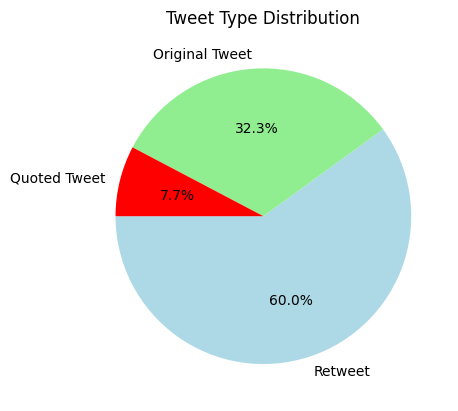

In [32]:
plt.pie(tweet_counts, labels=tweet_counts.index, autopct='%1.1f%%', startangle=180, colors=['lightblue', 'lightgreen', 'red'])
plt.title('Tweet Type Distribution')
plt.show()

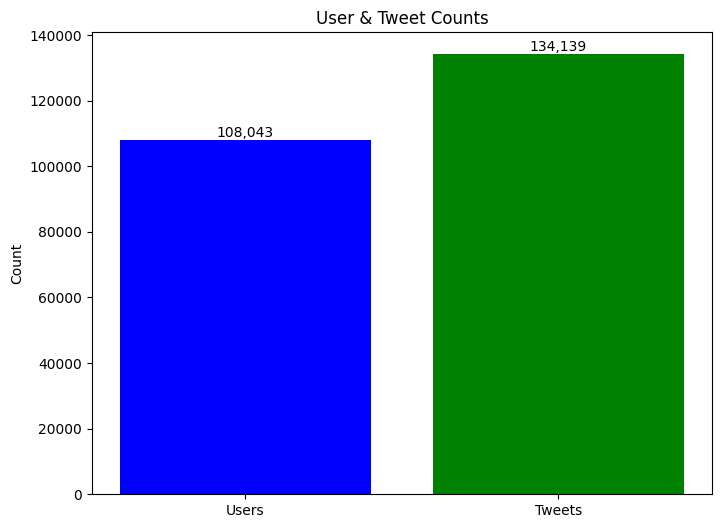

In [35]:
categories = ['Users', 'Tweets']
values = [108043, 134139]
colors = ['blue', 'green']  # Baby blue and light pink

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,}', ha='center', va='bottom', fontsize=10, color='black')


plt.ylabel('Count')
plt.title('User & Tweet Counts')
plt.show()